[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nepal-College-of-Information-Technology/AI-Data-Science-Worksop-2024/blob/main/Practice%20Yourself/Assignment_4.2_Seaborn_Plotly.ipynb)

# Assignment 4.2: Seaborn and Plotly Visualizations

This assignment consists of 10 tasks designed to help you practice using Seaborn for statistical plots and Plotly for interactive visualizations.

---

## **Easy Tasks**:

### **Task 1**: Create a heatmap using Seaborn with the `tips` dataset.
   - Use ```sns.heatmap(tips.corr(), annot=True)```.

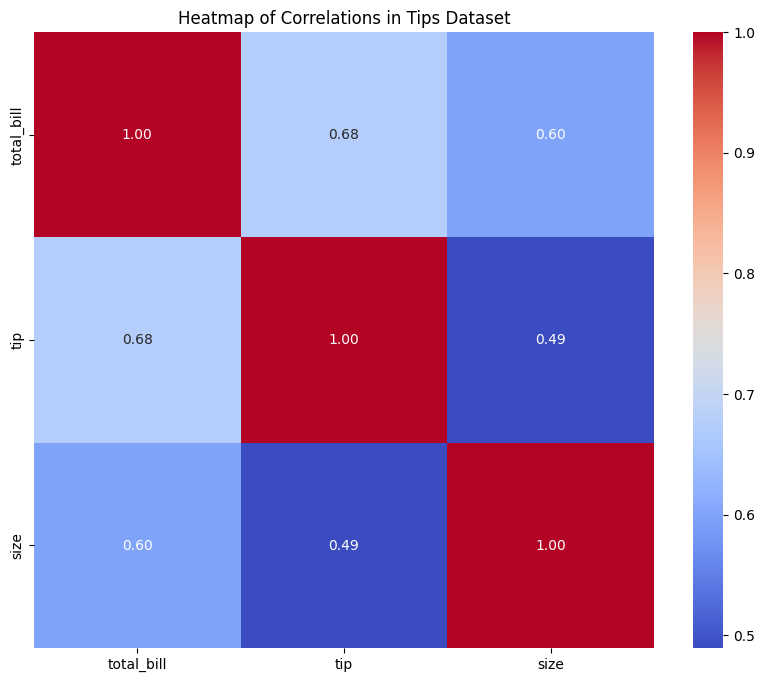

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')

numeric_data = tips.select_dtypes(include='number')

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Heatmap of Correlations in Tips Dataset")

plt.show()


### Task 2: Create a pair plot using Seaborn with the tips dataset.
  - Use sns.pairplot(tips).

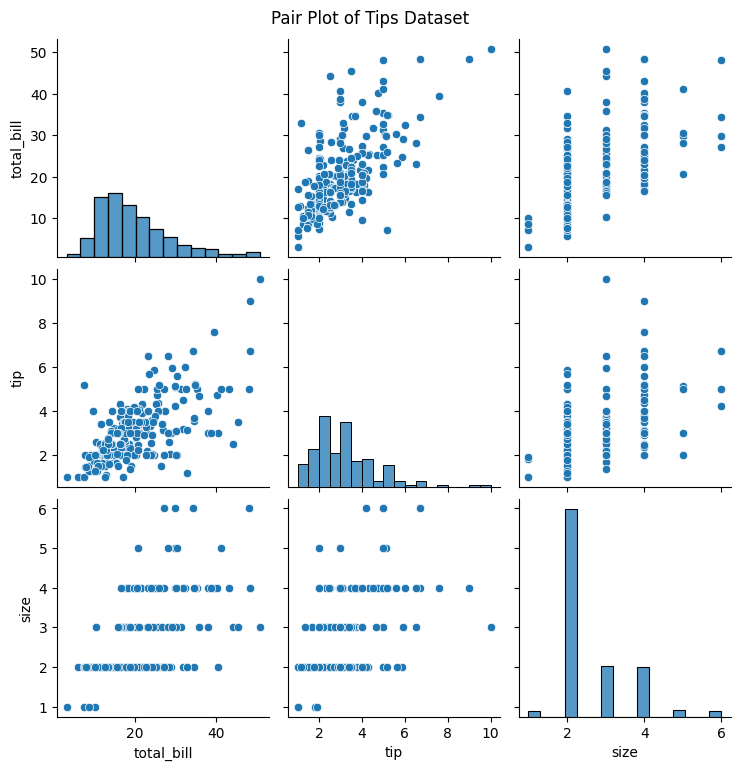

In [6]:
tips = sns.load_dataset('tips')

sns.pairplot(tips)

plt.suptitle("Pair Plot of Tips Dataset", y=1.02)

plt.show()

### Task 3: Create a box plot of total_bill for each day using Seaborn.

<ipython-input-7-253db5c2c81d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day', y='total_bill', data=tips, palette='pastel')


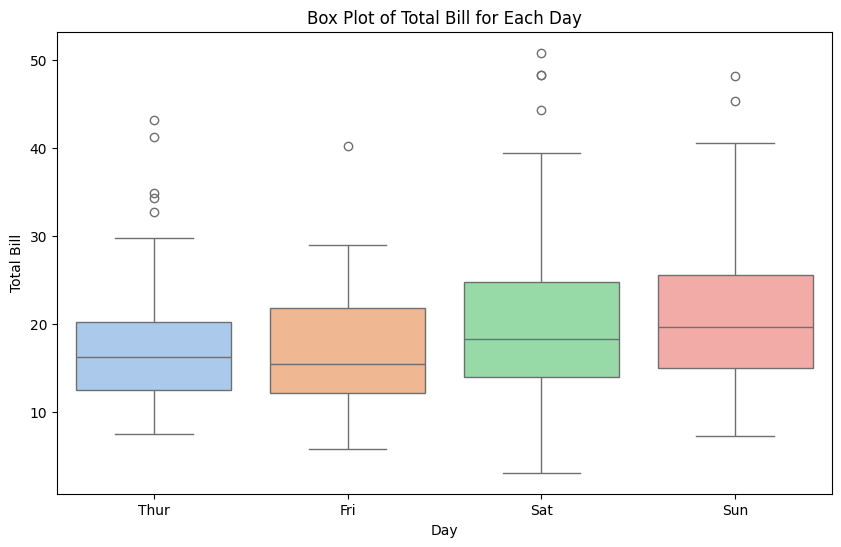

In [7]:
sns.load_dataset('tips')

plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='total_bill', data=tips, palette='pastel')

plt.title("Box Plot of Total Bill for Each Day")
plt.xlabel("Day")
plt.ylabel("Total Bill")

plt.show()

---

## Medium-Level Tasks:

### Task 4: Create an interactive line plot using Plotly to show temperature trends over a week.

  - Use days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] and temperature = [15, 16, 17, 19, 20, 18, 17].

In [9]:
import plotly.graph_objects as go

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
temperatures = [22, 24, 19, 26, 23, 25, 28]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=days,
    y=temperatures,
    mode='lines+markers',
    name='Temperature Trend',
    line=dict(color='blue', width=2),
    marker=dict(size=8, color='red')
))

fig.update_layout(
    title='Temperature Trends Over a Week',
    xaxis_title='Day of the Week',
    yaxis_title='Temperature (°C)',
    template='plotly_dark'
)

fig.show()


### Task 5: Create an interactive scatter plot using Plotly to visualize total_bill vs tip from the tips dataset.

In [11]:
import plotly.express as px

fig = px.scatter(
    tips,
    x='total_bill',
    y='tip',
    color='day',
    size='size',
    hover_name='sex',
    title='Scatter Plot of Total Bill vs Tip',
    labels={'total_bill': 'Total Bill ($)', 'tip': 'Tip ($)'}
)

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Task 6: Create a customized box plot using Seaborn, and add a title.
  - Use the tips dataset.

<ipython-input-12-cfcee6f18c19>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




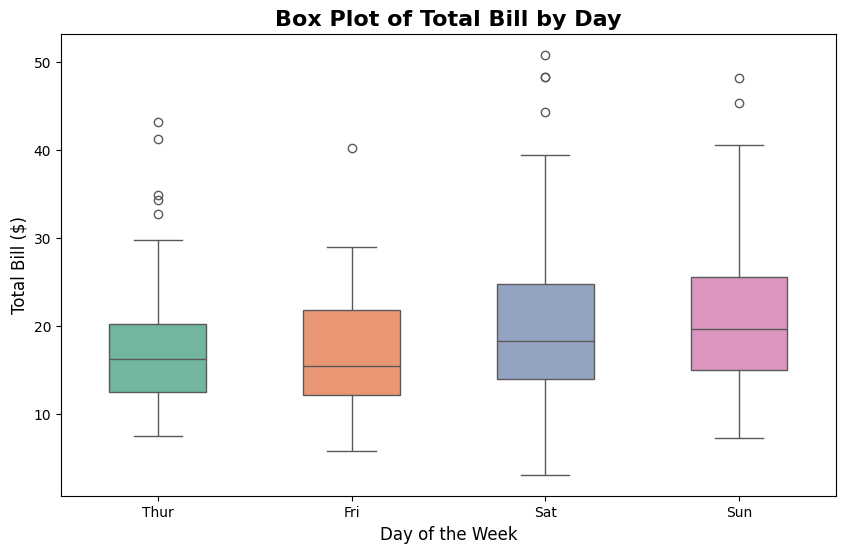

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='total_bill', data=tips, palette='Set2', width=0.5)

plt.title("Box Plot of Total Bill by Day", fontsize=16, fontweight='bold')
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Total Bill ($)", fontsize=12)

plt.show()

### Task 7: Create an interactive pie chart using Plotly to represent the distribution of smoker and non-smoker in the tips dataset.

In [13]:
smoker_counts = tips['smoker'].value_counts()

fig = px.pie(
    names=smoker_counts.index,
    values=smoker_counts.values,
    title='Distribution of Smokers and Non-Smokers',
    labels={'names': 'Smoker Status', 'values': 'Count'},
    color=smoker_counts.index,
    color_discrete_map={'Yes': 'lightcoral', 'No': 'lightblue'}
)

fig.show()

---

## Challenging Tasks:

### Task 8: Create an advanced interactive line plot using Plotly with hover information for days and temperature.

In [14]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
temperatures = [22, 24, 19, 26, 23, 25, 28]

fig = px.line(
    x=days,
    y=temperatures,
    labels={'x': 'Day of the Week', 'y': 'Temperature (°C)'},
    title='Temperature Trends Over a Week'
)

fig.update_traces(
    hovertemplate='Day: %{x}<br>Temp: %{y}°C<extra></extra>'
)

fig.show()

### Task 9: Create a Seaborn heatmap with custom color palette for the tips dataset.

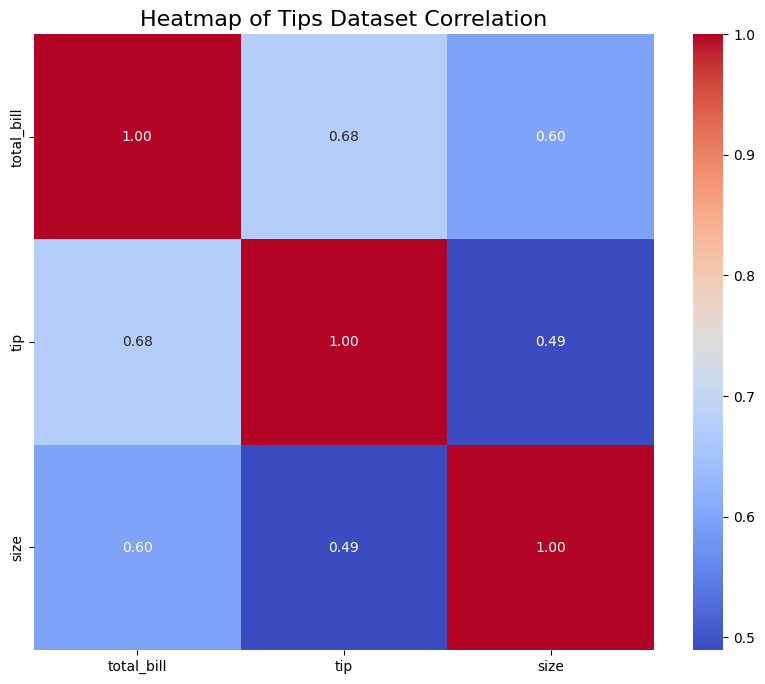

In [16]:
numeric_tips = tips.select_dtypes(include=['number'])

custom_palette = sns.color_palette("coolwarm", as_cmap=True)

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_tips.corr(), annot=True, cmap=custom_palette, fmt='.2f')

plt.title('Heatmap of Tips Dataset Correlation', fontsize=16)
plt.show()

### Task 10: Create a multi-panel interactive figure using Plotly that includes:

  - One panel with a scatter plot of total_bill vs tip,
  - Another panel with a pie chart showing the distribution of time (Lunch vs Dinner).

In [18]:
import plotly.subplots as sp

fig = sp.make_subplots(
    rows=1, cols=2,
    subplot_titles=("Scatter Plot", "Pie Chart"),
    specs=[[{'type': 'scatter'}, {'type': 'pie'}]]
)

fig.add_trace(
    go.Scatter(x=tips['total_bill'], y=tips['tip'], mode='markers', name='Total Bill vs Tip'),
    row=1, col=1
)

time_counts = tips['time'].value_counts()
fig.add_trace(
    go.Pie(labels=time_counts.index, values=time_counts.values, name='Time Distribution'),
    row=1, col=2
)

fig.update_layout(title_text="Interactive Multi-Panel Figure")

fig.show()

---